In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
# Loading mapping files
mapping_to_token = pd.read_csv("../csv_files/EvalJava_csv/mapping_token.csv")
mapping_to_ast = pd.read_csv("../csv_files/EvalJava_csv/mapping_ast.csv")
mapping_to_rel_ast = pd.read_csv("../csv_files/EvalJava_csv/mapping_relative_ast.csv")
mapping_to_comp_sort_ast = pd.read_csv("../csv_files/EvalJava_csv/mapping_sorted_comp_ast.csv")

mapping = {"token" : mapping_to_token, "ast" : mapping_to_ast, "relative_ast" : mapping_to_rel_ast, "comp_sorted_ast" : mapping_to_comp_sort_ast}

d_type = {"commit_hash" : "str", 	"num_additions" : int,	"num_deletions": int, "filename" : "str"}

# Function for loading data
def load_data(file):
    df = pd.read_csv(file)
    df = df[df.filename.str.endswith(".java")]
    return pd.DataFrame({"commit_hash": df.commit_hash, "changes": pd.to_numeric(df.num_additions) + pd.to_numeric(df.num_deletions)})

# Loading data
data_java = load_data("../csv_files/EvalJava_csv/output_java.csv")
#data_java_nws = load_data("../csv_files/EvalJava_csv/output_nws.csv") 
data_token = load_data("../csv_files/EvalJava_csv/output_token.csv")
data_ast = load_data("../csv_files/EvalJava_csv/output_ast.csv")
data_comp_sort_ast = load_data("../csv_files/EvalJava_csv/output_sorted_comp_ast.csv")
data_rel_ast = load_data("../csv_files/EvalJava_csv/output_relative_ast.csv")

data = {"java" : data_java, "token" : data_token, "ast" : data_ast, "comp_sort_ast" : data_comp_sort_ast,"relative_ast" : data_rel_ast}

In [4]:
# Setting up dataframes
df_java = data_java.groupby('commit_hash').sum()
#df_java_nws = data_java_nws.groupby('commit_hash').sum()
df_token = pd.merge(data_token, mapping_to_token, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_token"}).drop(columns=["to", "commit_hash_token"]).groupby('commit_hash').sum()
df_ast = pd.merge(data_ast, mapping_to_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_ast"}).drop(columns=["to", "commit_hash_ast"]).groupby('commit_hash').sum()
df_sort_comp_ast = pd.merge(data_comp_sort_ast, mapping_to_comp_sort_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_comp_ast"}).drop(columns=["to", "commit_hash_comp_ast"]).groupby('commit_hash').sum()
df_rel_ast = pd.merge(data_rel_ast, mapping_to_rel_ast, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_rel_ast"}).drop(columns=["to", "commit_hash_rel_ast"]).groupby('commit_hash').sum()

dfs = {"java" : df_java, "token" : df_token, "ast" : df_ast, "sort_comp_ast" : df_sort_comp_ast, "relative_ast" : df_rel_ast}

In [5]:
def mergeall(**dfs):
    items = dfs.items()
    table = df_java.rename(columns = dict(changes="repo"))
    for key, df in items:
        table = pd.merge(table, df.rename(columns = dict(changes=key)), left_index=True, right_index=True, validate="1:1", how="outer")
    return table

df_merged = mergeall(token = df_token, ast = df_ast, sorted_comp_ast = df_sort_comp_ast, relative_ast = df_rel_ast).fillna(0, downcast="int64")

df_merged.isna().sum()
df_merged

,repo,token,ast,sorted_comp_ast,relative_ast
commit_hash,,,,,
046066660159f66d3759824173a627d68c84296b,31,130,198,111,198
29147d4f76d76da98cf9ff94fbcc7d15c48b2203,4,2,2,12,2
4c454b387cd45c2bc2e31a39ab866158d0540bb2,6,0,0,0,0
5d174b5fd8c2d67c1cc4695891730cb389fd2193,4,2,2,8,2
688714724404f4512b62a48f9a5d21e1f98a13e1,8,8,8,36,8
7702745c4f013cf3afeb9c7994b451658a5d3ac7,4,17,111,20,33
a8b16df8f64f69424e9dd630d654b30f1d337675,10,32,74,6,52
b5164dcf234eba6e40b28a81879dd35302ac4d01,1,0,0,0,0
b9f3fb6aecf1195a65e9f1dea9d5ac2a5d61869d,2,2,2,20,2


<function matplotlib.pyplot.show(close=None, block=None)>

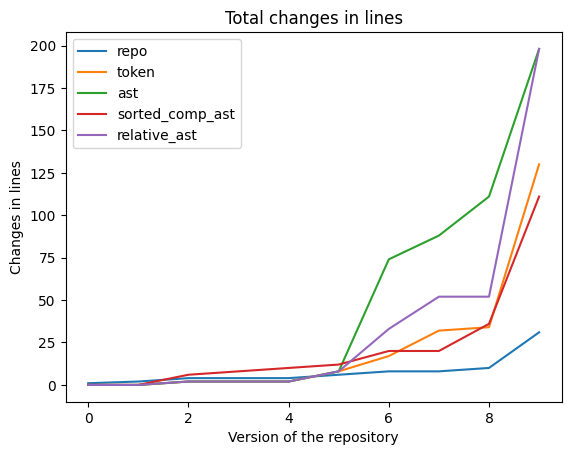

In [6]:
df = pd.DataFrame({k : np.array(df_merged[k].sort_values()) for k in df_merged.columns})
df.plot()
plt.xlabel("Version of the repository")
plt.ylabel("Changes in lines")
plt.title("Total changes in lines")
plt.show

In [17]:
len(df)

22

<Axes: >

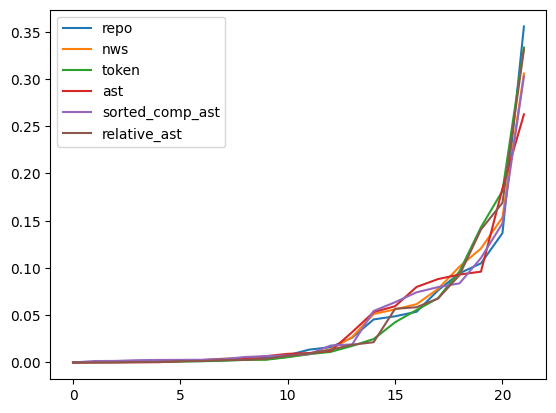

In [8]:
(df / df.sum()).plot()

<Axes: >

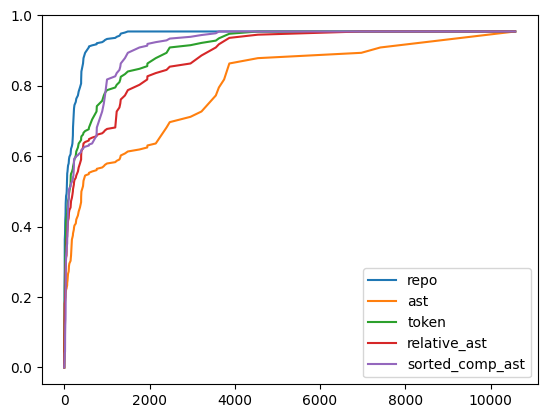

In [9]:
# 1.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "ast", "token", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/len(df.index)}, index = df[key])
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot()

<Axes: >

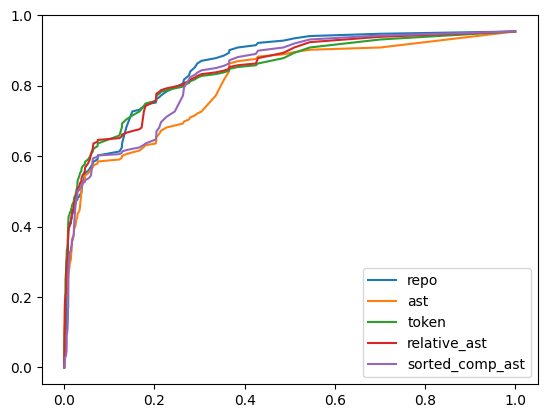

In [8]:
# 2.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "ast", "token", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/len(df.index)}, index = df[key] / max(df[key]))
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot()

<Axes: xlabel='repo'>

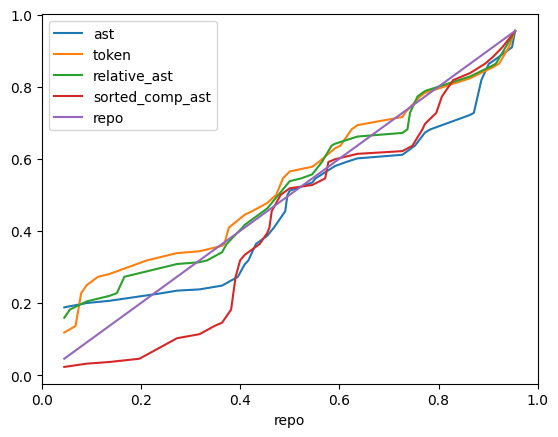

In [18]:
# 3.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "ast", "token", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/len(df.index)}, index = df[key] / max(df[key]))
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() 

p_p = cdf_rel.set_index("repo").assign(repo = cdf_rel.repo.values)
p_p.plot()

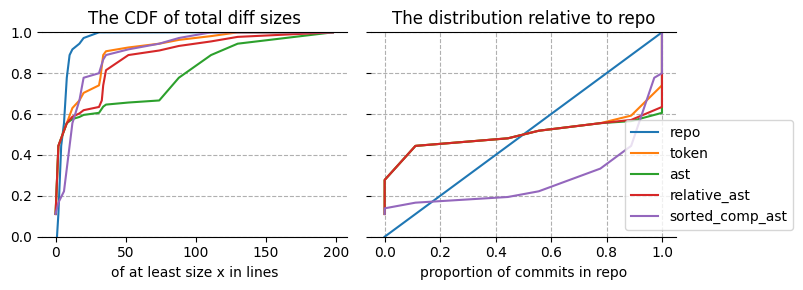

In [7]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(7,3))
axes = axes.flatten()
args = {"legend" : False, "ylim" : (0,1)}

# 1.	The distribution of diff changes. It should read: the chance of getting a commit of at least size "x" is "y". 
# https://en.wikipedia.org/wiki/Cumulative_distribution_function

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/(len(df.index)-1)}, index = df[key])
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_tot = pd.DataFrame(data = data).interpolate() 
cdf_tot.plot(ax=axes[0], title="The CDF of total diff sizes", xlabel="of at least size x in lines", **args)
cdf_tot.repo = cdf_tot.repo.fillna(0)
p_p = cdf_tot.set_index("repo").assign(repo = cdf_tot.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")


handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15,0.4))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

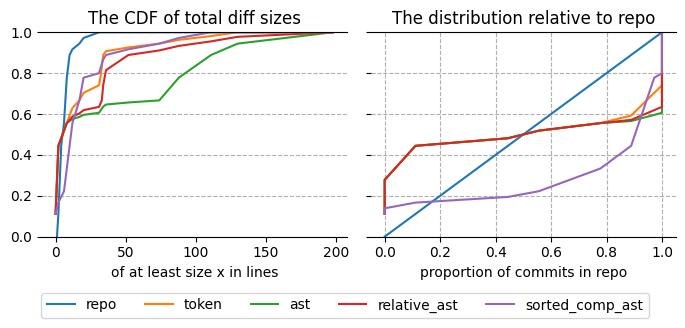

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(7, 3))
axes = axes.flatten()
args = {"legend": False, "ylim": (0, 1)}

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

data = {}

for key in keys:
    df_x = pd.DataFrame(data={key: df.index / (len(df.index) - 1)}, index=df[key])
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]

cdf_tot = pd.DataFrame(data=data).interpolate()
cdf_tot.plot(ax=axes[0], title="The CDF of total diff sizes", xlabel="of at least size x in lines", **args)
cdf_tot.repo = cdf_tot.repo.fillna(0)
p_p = cdf_tot.set_index("repo").assign(repo=cdf_tot.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.show()

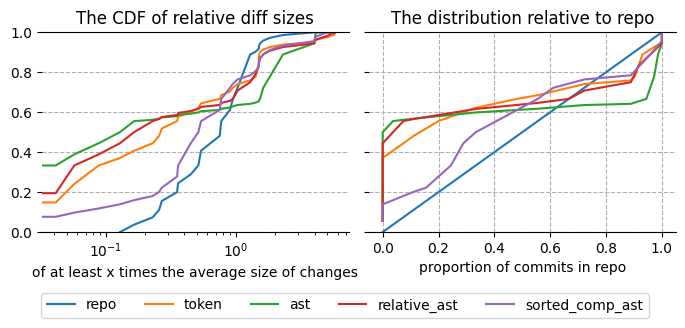

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(7, 3))
axes = axes.flatten()
args = {"legend": False, "ylim": (0, 1)}

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

# -----
# 2.	2.	The distribution of relative diff changes. It should read: the chance of getting 
# a commit that contributes at least "x" percent of the total repository is "y".  
# https://en.wikipedia.org/wiki/Cumulative_distribution_function
data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/(len(df.index)-1)}, index = df[key] / df[key].mean())
    df_x = df_x.groupby(df_x.index).mean()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot(ax=axes[0],title="The CDF of relative diff sizes", xlabel="of at least x times the average size of changes", **args)
axes[0].xaxis.set_major_formatter(lambda y,z: f"{y*100:0.0f}%")
axes[0].set_xscale('log')

# 3.	3.	The relative distribution of relative diff changes compared with the original distribution. 
# I think we can calculate this by doing where Fast(Foriginal-1(r)).  
#  https://blogs.iq.harvard.edu/relative_distri
cdf_rel.repo = cdf_rel.repo.fillna(0)
p_p = cdf_rel.set_index("repo").assign(repo = cdf_rel.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")
# -----
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.show()

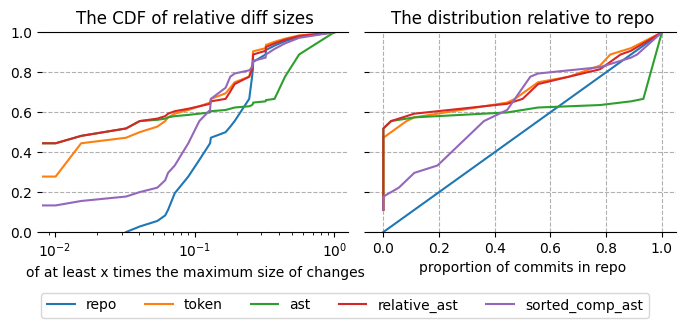

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(7, 3))
axes = axes.flatten()
args = {"legend": False, "ylim": (0, 1)}

keys = ["repo", "token", "ast", "relative_ast", "sorted_comp_ast"]

# 2.	2.	The distribution of relative diff changes. It should read: the chance of getting 
# a commit that contributes at least "x" percent of the total repository is "y".  
# https://en.wikipedia.org/wiki/Cumulative_distribution_function
data = {}

for key in keys:
    df_x = pd.DataFrame(data = {key : df.index/(len(df.index)-1)}, index = df[key] / max(df[key]))
    df_x = df_x.groupby(df_x.index).max()
    data[key] = df_x[key]
    
cdf_rel = pd.DataFrame(data = data).interpolate() # .fillna(method="ffill").fillna(0)
cdf_rel.plot(ax=axes[0],title="The CDF of relative diff sizes", xlabel="of at least x times the maximum size of changes", **args)
axes[0].xaxis.set_major_formatter(lambda y,z: f"{y*100:0.0f}%")
axes[0].set_xscale('log')

# 3.	3.	The relative distribution of relative diff changes compared with the original distribution. 
# I think we can calculate this by doing where Fast(Foriginal-1(r)).  
#  https://blogs.iq.harvard.edu/relative_distri
cdf_rel.repo = cdf_rel.repo.fillna(0)
p_p = cdf_rel.set_index("repo").assign(repo = cdf_rel.repo.values)
p_p[keys].plot(ax=axes[1], title="The distribution relative to repo", xlabel="proportion of commits in repo", **args)
axes[1].xaxis.grid(True, ls="--")

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
fig.tight_layout()

for ax in axes:
    ax.yaxis.grid(True, ls="--")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.show()

In [12]:
df

,repo,token,ast,sorted_comp_ast,relative_ast
0,1,0,0,0,0
1,2,0,0,0,0
2,4,2,2,6,2
3,4,2,2,8,2
4,4,2,2,10,2
5,6,8,8,12,8
6,8,17,74,20,33
7,8,32,88,20,52
8,10,34,111,36,52
9,31,130,198,111,198


<Axes: >

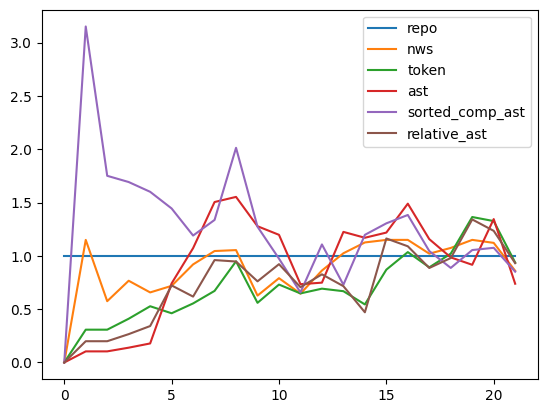

In [21]:
m = df.sum()
dt = df/m
dt.div(dt.repo, axis=0).plot()

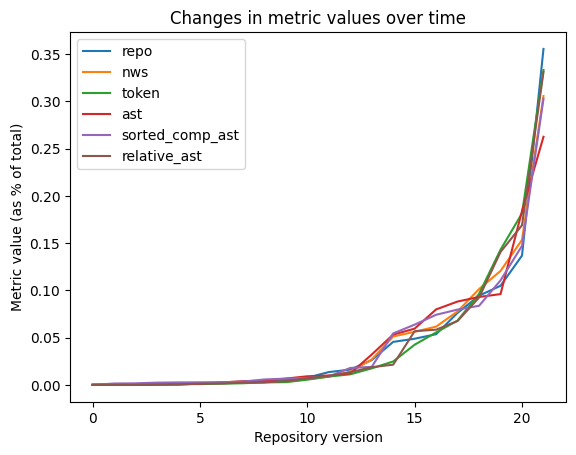

In [ ]:
import matplotlib.pyplot as plt

(df[['repo','nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='line')
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Changes in metric values over time')
plt.show()


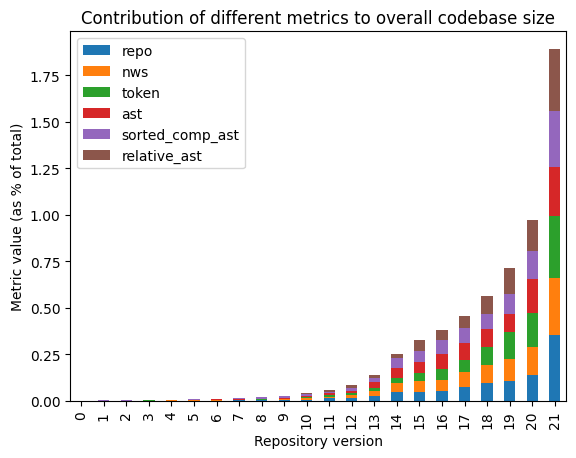

In [ ]:
import matplotlib.pyplot as plt

(df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']] / df[['repo', 'nws', 'token', 'ast', 'sorted_comp_ast', 'relative_ast']].sum()).plot(kind='bar', stacked=True)
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Contribution of different metrics to overall codebase size')
plt.show()


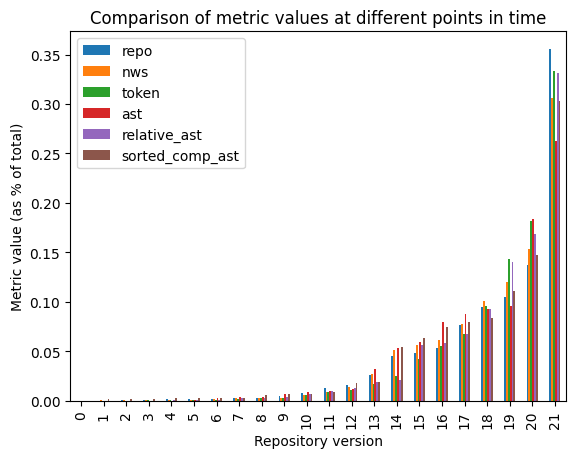

In [19]:
import matplotlib.pyplot as plt

(df[['repo', 'nws', 'token', 'ast', 'relative_ast', 'sorted_comp_ast']] / df[['repo', 'nws', 'token', 'ast', 'relative_ast', 'sorted_comp_ast']].sum()).plot(kind='bar')
plt.xlabel('Repository version')
plt.ylabel('Metric value (as % of total)')
plt.title('Comparison of metric values at different points in time')
plt.show()


Text(0.5, 1.0, 'Contribution of each commit (cumulative) to all commits')

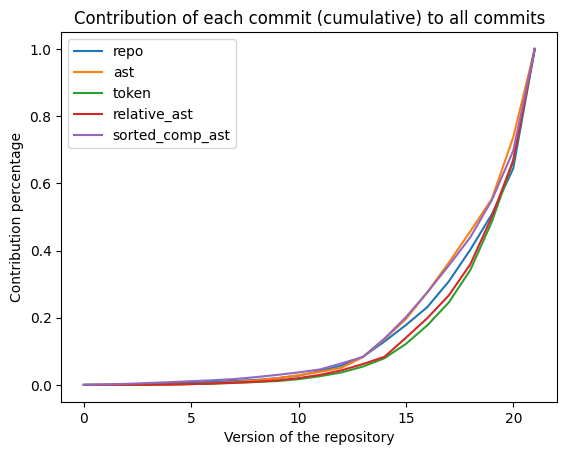

In [11]:
(df[['repo', 'ast', 'token', 'relative_ast', 'sorted_comp_ast']].cumsum() / df[['repo', 'ast', 'token', 'relative_ast', 'sorted_comp_ast']].sum()).plot()
plt.xlabel('Version of the repository')
plt.ylabel('Contribution percentage')
plt.title('Contribution of each commit (cumulative) to all commits')

In [ ]:
df.cumsum().plot()

In [ ]:
#find størrelsen af filen for at finde en relativ ændring 
df_merged[df_merged.repo != 0][df_merged.nws == 0]

In [ ]:
df_merged / df_merged.sum()